In [1]:
"""
Paper   : https://arxiv.org/pdf/1808.00508v1.pdf
Authors : Andrew Trask, Felix Hill, Scott Reed, Jack Rae
"""

'\nPaper   : https://arxiv.org/pdf/1808.00508v1.pdf\nAuthors : Andrew Trask, Felix Hill, Scott Reed, Jack Rae\n'

## Neural Accumulator

![Neural Accumulator](https://cdn-images-1.medium.com/max/1600/1*vMYerlUvUP5gw4LDZv-aSg.png)

In [4]:
import torch
import torch.nn as nn
from torch.nn.parameter import Parameter
import numpy as np
import matplotlib.pyplot as plt

In [15]:
class NeuralAccumulator(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(NeuralAccumulator, self).__init__()
        self.W1 = Parameter(torch.Tensor(out_dim, in_dim))
        self.W2 = Parameter(torch.Tensor(out_dim, in_dim))
        self.register_parameter('bias', None)
        
        self.W = Parameter(torch.tanh(self.W1) * torch.sigmoid(self.W2))
        
        nn.init.xavier_uniform_(self.W1)
        nn.init.xavier_uniform_(self.W2)
        
    def forward(self, x):
        out = nn.functional.linear(x, self.W, self.bias)
        return out

### Neural Accumulator for Extrapolation

In [8]:
def dataset(train_size, test_size, fn):
    X = torch.Tensor(train_size + test_size, 2)
    Y = torch.Tensor(train_size + test_size, 1)

    for i in range(train_size + test_size):
        x = torch.rand(2)*10
        y = torch.tensor([fn(*x)])
        X[i] = x
        Y[i] = y
    
    X_train, y_train = X[:train_size], Y[:train_size]
    X_test, y_test = X[train_size:], Y[train_size:]
    return X_train, y_train, X_test, y_test

In [9]:
f = lambda x, y: x + y
X_train, y_train, X_test, y_test = dataset(1000, 200, f)

In [12]:
for i in range(10):
    print(f'X = {X_train[i]}\ty = {y_train[i]}')

X = tensor([ 5.6294,  3.7205])	y = tensor([ 9.3499])
X = tensor([ 3.3979,  0.0743])	y = tensor([ 3.4722])
X = tensor([ 2.2337,  0.3268])	y = tensor([ 2.5605])
X = tensor([ 4.2039,  9.6030])	y = tensor([ 13.8069])
X = tensor([ 1.9430,  1.5801])	y = tensor([ 3.5230])
X = tensor([ 7.1482,  3.1841])	y = tensor([ 10.3323])
X = tensor([ 7.6909,  8.4041])	y = tensor([ 16.0950])
X = tensor([ 5.4284,  2.1688])	y = tensor([ 7.5972])
X = tensor([ 3.5210,  7.8779])	y = tensor([ 11.3989])
X = tensor([ 5.3086,  8.7236])	y = tensor([ 14.0322])


In [43]:
nac = NeuralAccumulator(2,1)

In [44]:
nac(X_train[0])

tensor([ 2.8147])

In [45]:
optimizer = torch.optim.SGD(nac.parameters(), lr=1e-2)
crieterion = criterion = nn.MSELoss()

In [46]:
losses = []
for i in range(1000):
    out = nac(X_train)
    loss = crieterion(out, y_train)
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print("\t{}/{}: loss: {:.7f} ".format(i+1, num_iters, loss.item()))


	1/1000: loss: 66.5945282 
	2/1000: loss: 2.5424151 
	3/1000: loss: 0.5567204 
	4/1000: loss: 0.3531415 
	5/1000: loss: 0.2442876 
	6/1000: loss: 0.1696015 
	7/1000: loss: 0.1177661 
	8/1000: loss: 0.0817736 
	9/1000: loss: 0.0567815 
	10/1000: loss: 0.0394277 
	11/1000: loss: 0.0273775 
	12/1000: loss: 0.0190103 
	13/1000: loss: 0.0132002 
	14/1000: loss: 0.0091659 
	15/1000: loss: 0.0063645 
	16/1000: loss: 0.0044194 
	17/1000: loss: 0.0030687 
	18/1000: loss: 0.0021308 
	19/1000: loss: 0.0014796 
	20/1000: loss: 0.0010274 
	21/1000: loss: 0.0007134 
	22/1000: loss: 0.0004954 
	23/1000: loss: 0.0003440 
	24/1000: loss: 0.0002388 
	25/1000: loss: 0.0001658 
	26/1000: loss: 0.0001152 
	27/1000: loss: 0.0000800 
	28/1000: loss: 0.0000555 
	29/1000: loss: 0.0000386 
	30/1000: loss: 0.0000268 
	31/1000: loss: 0.0000186 
	32/1000: loss: 0.0000129 
	33/1000: loss: 0.0000090 
	34/1000: loss: 0.0000062 
	35/1000: loss: 0.0000043 
	36/1000: loss: 0.0000030 
	37/1000: loss: 0.0000021 
	38/1000:

	596/1000: loss: 0.0000000 
	597/1000: loss: 0.0000000 
	598/1000: loss: 0.0000000 
	599/1000: loss: 0.0000000 
	600/1000: loss: 0.0000000 
	601/1000: loss: 0.0000000 
	602/1000: loss: 0.0000000 
	603/1000: loss: 0.0000000 
	604/1000: loss: 0.0000000 
	605/1000: loss: 0.0000000 
	606/1000: loss: 0.0000000 
	607/1000: loss: 0.0000000 
	608/1000: loss: 0.0000000 
	609/1000: loss: 0.0000000 
	610/1000: loss: 0.0000000 
	611/1000: loss: 0.0000000 
	612/1000: loss: 0.0000000 
	613/1000: loss: 0.0000000 
	614/1000: loss: 0.0000000 
	615/1000: loss: 0.0000000 
	616/1000: loss: 0.0000000 
	617/1000: loss: 0.0000000 
	618/1000: loss: 0.0000000 
	619/1000: loss: 0.0000000 
	620/1000: loss: 0.0000000 
	621/1000: loss: 0.0000000 
	622/1000: loss: 0.0000000 
	623/1000: loss: 0.0000000 
	624/1000: loss: 0.0000000 
	625/1000: loss: 0.0000000 
	626/1000: loss: 0.0000000 
	627/1000: loss: 0.0000000 
	628/1000: loss: 0.0000000 
	629/1000: loss: 0.0000000 
	630/1000: loss: 0.0000000 
	631/1000: loss: 0.0

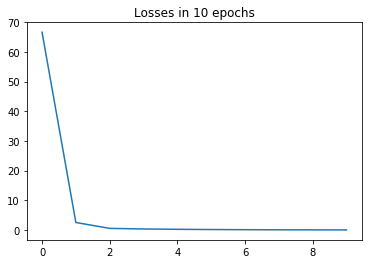

In [54]:
plt.plot(losses[:10])
plt.title('Losses in 10 epochs')
plt.show()

In [59]:
with torch.no_grad():
    train_out = nac(X_train)
    train_loss = crieterion(train_out, y_train)
    print(f'train loss = {train_loss}')

train loss = 9.989236000873536e-13


In [60]:
with torch.no_grad():
    test_out = nac(X_test)
    test_loss = crieterion(test_out, y_test)
    print(f'test loss = {test_loss}')

test loss = 9.74864611778814e-13


### Neural Accumulator vs MLP

In [81]:
class MLP(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(in_dim, 10)
        self.fc2 = nn.Linear(10, out_dim)
        self.relu = nn.ReLU()
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return self.relu(out)

In [82]:
mlp = MLP(2, 1)

In [83]:
mlp(X_train[0])

tensor([ 0.])

In [ ]:
mlp_losses = []
num_iters = 100000
for i in range(num_iters):
    out = mlp(X_train)
    loss = crieterion(out, y_train)
    mlp_losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i% 1000 == 0:
        print("\t{}/{}: mlp loss: {:.7f} ".format(i+1, num_iters, loss.item()))

	1/100000: mlp loss: 116.6307526 
	1001/100000: mlp loss: 116.6307526 
	2001/100000: mlp loss: 116.6307526 
	3001/100000: mlp loss: 116.6307526 
	4001/100000: mlp loss: 116.6307526 
	5001/100000: mlp loss: 116.6307526 
	6001/100000: mlp loss: 116.6307526 
	7001/100000: mlp loss: 116.6307526 
	8001/100000: mlp loss: 116.6307526 
	9001/100000: mlp loss: 116.6307526 
	10001/100000: mlp loss: 116.6307526 
	11001/100000: mlp loss: 116.6307526 
	12001/100000: mlp loss: 116.6307526 
	13001/100000: mlp loss: 116.6307526 
	14001/100000: mlp loss: 116.6307526 
	15001/100000: mlp loss: 116.6307526 
	16001/100000: mlp loss: 116.6307526 
	17001/100000: mlp loss: 116.6307526 
	18001/100000: mlp loss: 116.6307526 
	19001/100000: mlp loss: 116.6307526 
	20001/100000: mlp loss: 116.6307526 
	21001/100000: mlp loss: 116.6307526 
	22001/100000: mlp loss: 116.6307526 
	23001/100000: mlp loss: 116.6307526 
	24001/100000: mlp loss: 116.6307526 
	25001/100000: mlp loss: 116.6307526 
	26001/100000: mlp loss: 

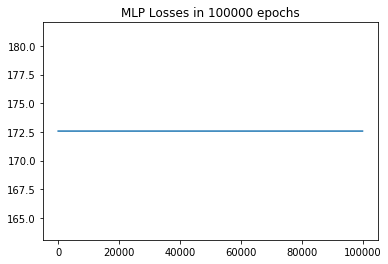

In [76]:
plt.plot(mlp_losses)
plt.title('MLP Losses in 100000 epochs')
plt.show()

##  Neural Arithmetic Logic Unit Cell 

In [ ]:
class NALU(nn.Module):
    def __init__(self, in_dim, out_dim, hidden_dim, num_layers, e=1e-5):
        super(NALU, self).__init__()
        